<a href="https://colab.research.google.com/github/AuFeld/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Chase_Goldfeld_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# import tools
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt

In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [38]:
def variance(sales):
  v = (((sales -mean(sales))**2).sum()) / (len(sales) -1)
  return v

def mean(sales):
  m = (sales).sum() / len(sales)
  return m

def stdev(sales):
  s = math.sqrt(variance(sales))
  return s

print(variance(sales))
print(stdev(sales))
print(mean(sales))

214387.90476190473
463.0204150595357
3052.714285714286


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [39]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])
df = pd.DataFrame({"customers": customers, "sales": sales})
cov = df.cov()
cov

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [7]:
# find the std of customers who entered the store last week and sales

cov.loc["sales", "customers"]/(np.std(sales)*np.std(customers))

1.123306307450706

In [8]:
# standardize the covariance to find the correlation coeffecient that summarizes
# the relationship between sales and customers



df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


In [0]:
# there is a strong correlation between the relationship of customers and sales. 

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# import the df

df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

In [10]:
list(df.columns)

['Unnamed: 0',
 'pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest',
 'has_cabin_number']

In [11]:
# find the covariance

df[['age', 'fare']].cov()

,age,fare
age,165.850021,114.416613
fare,114.416613,2678.959738


In [12]:
df[['age', 'fare', 'survived']].corr()

,age,fare,survived
age,1.000000,0.171892,-0.050199
fare,0.171892,1.000000,0.244265
survived,-0.050199,0.244265,1.000000


In [0]:
# There is a weak correlation between the passengers of the Titanic regarding 
# their age, fare, and survival. 

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

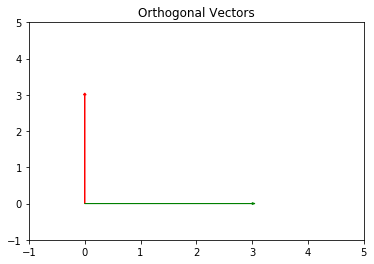

In [13]:
vector_1 = [0, 3]
vector_2 = [3, 0]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [14]:
a = [-5, 3, 7]

b = [6, -8, 2]

np.dot(a, b)

-40

In [0]:
# the vectors are not orthogonal because their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [15]:
x = 4 + 225 + 36 + 400
print(x) 

c = [2, -15, 6, 20]
y = np.dot(c, c)
print(y)

d = np.transpose(c)
z = np.dot(d, c)
print(z)

665
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = $\ 7\hat{i} + 12\hat{\jmath}$

e = $\ 2\hat{i} + 11\hat{\jmath} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [16]:
import math 

norm = 16 + 144 + 121 + 81 + 4

math.sqrt(norm)

19.131126469708992

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [25]:


g = [1, 2]
h = [4, 8]
r = [g, h]

print(r)

[[1, 2], [4, 8]]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [18]:
from numpy.linalg import matrix_rank 

P = [[1, 2, 3], [-1, 0, 7], [4, 8 , 2]]

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

In [0]:
# the rank of a matrix is the dimension of the vector space spanned by its columns. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

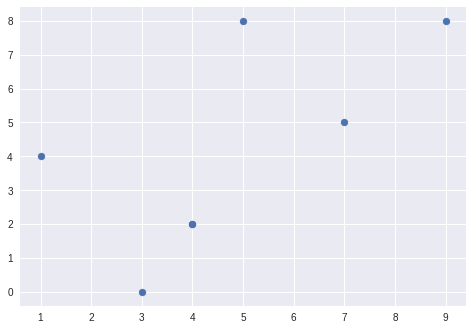

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()